 - https://www.g3journal.org/content/7/8/2719 - to get list of essential cells in stem cells - Table S2
 - crispr based list - https://www.nature.com/articles/s41556-018-0088-1#Sec33
 - another list? not really sure - check it out - https://www.sciencedirect.com/science/article/pii/S2211124719302128?via%3Dihub#app2

In [1]:
import pandas as pd
import csv
import numpy as np
import scipy
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=40,20
import matplotlib.mlab as mlab
from IPython.display import display
pd.options.display.max_columns = None
from numpy import random
from statsmodels import robust
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import itertools
import networkx as nx
import datetime

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import requests
import itertools
import networkx as nx
import datetime
import io
import random
import warnings
import json
import requests
import time

sns.set_palette("husl")


In [2]:
graph_params = pickle.load( open( "./iPSC/all_tissue_gene_graph_params_df_ipsc.p", "rb" ) )
gtex_params = pickle.load(open('./iPSC/gene_tissue_parameter_df_w_ipsc.p','rb'))

In [3]:
gtex_params = gtex_params[['Gene','Tissue','MeanExp','SDofExp','ZScore','MedianExp','Breadth','CoeffOfVar','MedAbsDev']]
gtex_params = gtex_params.rename(columns={"CoeffOfVar": "CV",'MedAbsDev':'MAD'})
gtex_params = gtex_params[gtex_params['Tissue']=='iPSC']
print(gtex_params.shape)
gtex_params.head(2)


(6330, 9)


,Gene,Tissue,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD
30,A1BG,iPSC,0.276511,0.166928,-0.168975,0.252296,0.000000,0.603693,0.157455
61,A1CF,iPSC,0.061459,0.123337,-0.165394,0.026737,0.589905,2.006809,0.032098


In [4]:
gtex_params.isnull().any()


Gene         False
Tissue       False
MeanExp      False
SDofExp      False
ZScore       False
MedianExp    False
Breadth      False
CV            True
MAD          False
dtype: bool

In [5]:
graph_params.isnull().any()
graph_params.head(4)

,Centrality_coeff,Clustering_coeff,Gene,IsKinase,IsTF,NeighborList,NumOfKinaseNbs,NumOfNeighbors,NumOfTFNeighbors,Sq_Clustering_coeff,Tissue
0,0.000147,0.125000,GRB7,0,0,"[ERBB2, KIT, ERBB3, GRB2, RND1, SHC1, RET, EPH...",3,19,1,0.002603,iPSC
1,0.005954,0.077434,ERBB2,0,0,"[GRB7, PAK1, DLG4, MUC4, PICK1, GRB2, TGFA, ER...",16,115,7,0.001435,iPSC
2,0.001194,0.071373,PAK1,1,0,"[ERBB2, PLCG1, LIMK1, RAC1, PAK1, HGS, NCK2, F...",9,53,8,0.001082,iPSC
3,0.002871,0.076655,DLG4,0,0,"[ERBB2, LYN, PTPRG, DLG3, NLGN3, LRP2, GRIK5, ...",3,44,2,0.001025,iPSC


In [6]:
gt_param_df_ipsc = pd.merge(gtex_params, graph_params,  how='inner', 
                       left_on=['Gene','Tissue'], right_on = ['Gene','Tissue'])


print(gt_param_df_ipsc.shape)
gt_param_df_ipsc.head(4)

(3834, 18)


,Gene,Tissue,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD,Centrality_coeff,Clustering_coeff,IsKinase,IsTF,NeighborList,NumOfKinaseNbs,NumOfNeighbors,NumOfTFNeighbors,Sq_Clustering_coeff
0,A1CF,iPSC,0.061459,0.123337,-0.165394,0.026737,0.589905,2.006809,0.032098,0.000006,0.000000,0,0,"[TNPO2, FHL3, PSMG3]",0,3,0,0.000000
1,AAAS,iPSC,113.082342,18.743962,2.408154,113.622117,1.000000,0.165755,20.398794,0.000032,0.244444,0,0,"[ISG15, NUDC, SUMO1, OBSL1, LYPD3, CUL7, XPO1,...",0,10,1,0.001206
2,AAGAB,iPSC,61.411809,10.297010,3.750179,59.889600,1.000000,0.167671,10.301162,0.000024,0.333333,0,0,"[AP2A1, AP2A2, AP1G1, AP2S1, STX4, AP1S2, XPO1...",0,9,0,0.003260
3,AAMP,iPSC,170.700936,27.378651,1.685050,171.571187,0.996845,0.160390,29.875843,0.000089,0.088889,0,0,"[PLIN3, HSF1, AEN, VPS52, PTPRU, WNK1, XPO1, A...",1,10,2,0.000756


In [7]:
gt_param_df_ipsc.isnull().any()


Gene                   False
Tissue                 False
MeanExp                False
SDofExp                False
ZScore                 False
MedianExp              False
Breadth                False
CV                     False
MAD                    False
Centrality_coeff       False
Clustering_coeff       False
IsKinase               False
IsTF                   False
NeighborList           False
NumOfKinaseNbs         False
NumOfNeighbors         False
NumOfTFNeighbors       False
Sq_Clustering_coeff    False
dtype: bool

In [8]:
# gtex_params = gtex_params[np.isfinite(gtex_params['CV'])]
# print(gtex_params.shape)


In [9]:
tissue_list = gt_param_df_ipsc['Tissue'].drop_duplicates().tolist()
gene_list = gt_param_df_ipsc['Gene'].drop_duplicates().tolist()
breadth_dict = {}
zscore_dict = {}
for tissue in tissue_list:
    breadth_dict[tissue] = {}
    zscore_dict[tissue] = {}


In [10]:
count = 0
for index,row in gt_param_df_ipsc.iterrows():
    count+=1
    gene = row['Gene']
    tissue = row['Tissue']
    breadth_dict[tissue][gene] = row['Breadth']
    zscore_dict[tissue][gene] = row['ZScore']
    if count%10000 ==  0:
        print(count)

In [11]:
count = 0
mean_breadth_list = []
mean_zscore_list = []
for index,row in gt_param_df_ipsc.iterrows():
    count+=1
    tissue = row['Tissue']
    nl = row['NeighborList']
#     print(tissue)
    if nl == 0:
        mean_breadth_list.append(0)
        mean_zscore_list.append(0)
    else:
        nl = list(set(nl)&set(gene_list))
        mean_breadth = np.mean([breadth_dict[tissue][x] for x in nl])
        mean_zscore = np.mean([zscore_dict[tissue][x] for x in nl])
        mean_breadth_list.append(mean_breadth)
        mean_zscore_list.append(mean_zscore)
    if count%10000 ==  0:
        print(count)
        
gt_param_df_ipsc['NeighborMeanBreadth'] = mean_breadth_list
gt_param_df_ipsc['NeighborMeanZscore'] = mean_zscore_list



In [12]:
gt_param_df_ipsc = gt_param_df_ipsc.drop(columns=[ 'NeighborList'])

In [13]:
gt_param_df_ipsc.head(2)

,Gene,Tissue,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD,Centrality_coeff,Clustering_coeff,IsKinase,IsTF,NumOfKinaseNbs,NumOfNeighbors,NumOfTFNeighbors,Sq_Clustering_coeff,NeighborMeanBreadth,NeighborMeanZscore
0,A1CF,iPSC,0.061459,0.123337,-0.165394,0.026737,0.589905,2.006809,0.032098,0.000006,0.000000,0,0,0,3,0,0.000000,0.983176,1.335035
1,AAAS,iPSC,113.082342,18.743962,2.408154,113.622117,1.000000,0.165755,20.398794,0.000032,0.244444,0,0,0,10,1,0.001206,0.974763,2.541551


In [14]:
np.max(gt_param_df_ipsc['Sq_Clustering_coeff'].tolist())

4.5

In [15]:
features = ['MeanExp', 'SDofExp', 'MedianExp','MAD',
            'NumOfKinaseNbs','NumOfNeighbors', 'NumOfTFNeighbors']

for feature in features:
    normalized_list = []
    tissue_max_vals =  gt_param_df_ipsc.groupby('Tissue')[feature].max()
    tissue_max_vals = tissue_max_vals.to_dict()
    print(feature)
    print(datetime.datetime.now())
    count = 0
    for index,row in gt_param_df_ipsc.iterrows():
        count+=1
        feature_val = row[feature]
        tissue = row['Tissue']
        feature_val = feature_val/tissue_max_vals[tissue]
        normalized_list.append(feature_val)
        if count % 10000 ==0:
            print(count)
            
    gt_param_df_ipsc[feature] = normalized_list



MeanExp
2021-01-10 21:49:32.572354
SDofExp
2021-01-10 21:49:32.908727
MedianExp
2021-01-10 21:49:33.254898
MAD
2021-01-10 21:49:33.592934
NumOfKinaseNbs
2021-01-10 21:49:33.930763
NumOfNeighbors
2021-01-10 21:49:34.269201
NumOfTFNeighbors
2021-01-10 21:49:34.607433


In [16]:
gt_param_df_ipsc.head(4)

,Gene,Tissue,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD,Centrality_coeff,Clustering_coeff,IsKinase,IsTF,NumOfKinaseNbs,NumOfNeighbors,NumOfTFNeighbors,Sq_Clustering_coeff,NeighborMeanBreadth,NeighborMeanZscore
0,A1CF,iPSC,0.000011,0.000072,-0.165394,0.000005,0.589905,2.006809,0.000016,0.000006,0.000000,0,0,0.000000,0.004910,0.000000,0.000000,0.983176,1.335035
1,AAAS,iPSC,0.019668,0.010921,2.408154,0.019540,1.000000,0.165755,0.010087,0.000032,0.244444,0,0,0.000000,0.016367,0.009009,0.001206,0.974763,2.541551
2,AAGAB,iPSC,0.010681,0.005999,3.750179,0.010299,1.000000,0.167671,0.005094,0.000024,0.333333,0,0,0.000000,0.014730,0.000000,0.003260,0.944269,2.083606
3,AAMP,iPSC,0.029689,0.015952,1.685050,0.029505,0.996845,0.160390,0.014774,0.000089,0.088889,0,0,0.027778,0.016367,0.018018,0.000756,0.880126,1.415679


In [17]:
# gt_param_df_ipsc.to_csv('./iPSC/gt_param_df_ipsc_50norm.csv',index = False)

In [18]:
gt_param_df = pd.read_csv('./data_generated/gt_param_df_wlabel.csv')
gt_param_df_ipsc = pd.read_csv('./iPSC/gt_param_df_ipsc_50norm.csv')

gt_param_df = gt_param_df.drop(columns=['IsKinase', 'IsTF','NeighborList','Gene','NeighborMedianBreadth','NeighborMedianZscore'])
gt_param_df = gt_param_df.rename(columns={"Description": "Gene"})
gt_param_df_ipsc = gt_param_df_ipsc.drop(columns=['IsKinase', 'IsTF','Sq_Clustering_coeff'])

gt_param_df = gt_param_df[list(gt_param_df_ipsc.columns) + ['Label']]

In [19]:
print(gt_param_df.shape)
print(gt_param_df_ipsc.shape)


(453455, 17)
(3834, 16)


In [20]:
gt_param_df_ipsc.dtypes

Gene                    object
Tissue                  object
MeanExp                float64
SDofExp                float64
ZScore                 float64
MedianExp              float64
Breadth                float64
CV                     float64
MAD                    float64
Centrality_coeff       float64
Clustering_coeff       float64
NumOfKinaseNbs         float64
NumOfNeighbors         float64
NumOfTFNeighbors       float64
NeighborMeanBreadth    float64
NeighborMeanZscore     float64
dtype: object

In [21]:
gt_param_df.head()

,Gene,Tissue,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD,Centrality_coeff,Clustering_coeff,NumOfKinaseNbs,NumOfNeighbors,NumOfTFNeighbors,NeighborMeanBreadth,NeighborMeanZscore,Label
0,SAMD11,Stomach,4.720096,4.267317,-0.036851,3.423000,0.763231,0.904074,2.489289,1.209951e-06,0.047619,0,7,2,0.296060,-0.366241,U
1,NOC2L,Stomach,44.847466,15.854806,-0.412520,42.380001,0.220056,0.353527,14.366420,9.446877e-05,0.253545,2,110,15,0.349456,-0.245143,N
2,KLHL17,Stomach,11.037735,4.394696,-0.145059,10.360000,0.445682,0.398152,3.558246,2.254576e-07,0.333333,0,4,0,0.300836,-0.350367,U
3,PLEKHN1,Stomach,1.643722,1.750657,-0.314139,1.138000,0.682451,1.065057,1.040194,5.063642e-07,0.000000,0,3,1,0.470752,0.818392,U
4,PERM1,Stomach,0.612194,0.432204,-0.298348,0.489900,0.454039,0.705991,0.274874,0.000000e+00,0.000000,0,1,0,0.311978,-0.253442,N


In [22]:
gt_param_df_ipsc.head()

,Gene,Tissue,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD,Centrality_coeff,Clustering_coeff,NumOfKinaseNbs,NumOfNeighbors,NumOfTFNeighbors,NeighborMeanBreadth,NeighborMeanZscore
0,A1CF,iPSC,0.000011,0.000072,-0.165394,0.000005,0.589905,2.006809,0.000016,0.000006,0.000000,0.000000,0.004910,0.000000,0.983176,1.335035
1,AAAS,iPSC,0.019668,0.010921,2.408154,0.019540,1.000000,0.165755,0.010087,0.000032,0.244444,0.000000,0.016367,0.009009,0.974763,2.541551
2,AAGAB,iPSC,0.010681,0.005999,3.750179,0.010299,1.000000,0.167671,0.005094,0.000024,0.333333,0.000000,0.014730,0.000000,0.944269,2.083606
3,AAMP,iPSC,0.029689,0.015952,1.685050,0.029505,0.996845,0.160390,0.014774,0.000089,0.088889,0.027778,0.016367,0.018018,0.880126,1.415679
4,AASS,iPSC,0.049496,0.066663,4.690561,0.048664,1.000000,0.402048,0.053329,0.000003,0.166667,0.027778,0.006547,0.009009,0.926656,1.351420


In [23]:
gene_list = []
tissue_list = []
probability_list = []
zs_list = []

train_df = gt_param_df[gt_param_df['Label'] != 'U']
labels = []

for index,row in train_df.iterrows():
    if row['Label'] == 'P':
        labels.append(1)
    else:
        labels.append(0)


train_df['Label'] = labels
test_df  =  gt_param_df_ipsc

X_train = train_df.drop(['Gene', 'Tissue', 'Label'],axis=1)
y_train = train_df['Label'].tolist()

X_test = test_df.drop(['Gene', 'Tissue'],axis=1)

model = XGBClassifier(max_depth=5, n_estimators=100,
                      learning_rate=0.2,scale_pos_weight=10,objective = 'binary:logistic')
model.fit(X_train, y_train)

tl = test_df['Tissue'].tolist()
gl = test_df['Gene'].tolist()
zs  = test_df['ZScore'].tolist()
y_scores = model.predict_proba(X_test)
pl = []
for i in y_scores:
    pl.append(i[1])


gene_list+= gl
tissue_list+= tl
probability_list+=pl
zs_list+=zs

/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [24]:
print(len(gene_list))
print(len(tissue_list))
print(len(probability_list))



3834
3834
3834


In [25]:
ipsc_prob_df = pd.DataFrame({'Gene': gene_list, 'Tissue': tissue_list,'Probability': probability_list,'Zscore':zs_list})

ipsc_prob_df = ipsc_prob_df[['Gene','Tissue','Zscore','Probability']]
ipsc_prob_df['Prob_ranking'] = ipsc_prob_df['Probability'].rank(pct = True)
ipsc_prob_df['Zscore_ranking'] = ipsc_prob_df['Zscore'].rank(pct = True)

ipsc_prob_df = ipsc_prob_df.sort_values(by=['Probability'],ascending=False)
print(ipsc_prob_df.shape)

ipsc_prob_df.head()

(3834, 6)


,Gene,Tissue,Zscore,Probability,Prob_ranking,Zscore_ranking
3583,UCHL1,iPSC,2.210405,0.670096,1.000000,0.673448
3,AAMP,iPSC,1.685050,0.668656,0.999739,0.600417
474,CD9,iPSC,1.149646,0.530307,0.999478,0.497392
3732,WRN,iPSC,3.025612,0.519672,0.999218,0.767866
600,CKS2,iPSC,4.846468,0.497037,0.998957,0.942358


In [26]:
# ipsc_prob_df.to_csv('./iPSC/ipsc_prob_df.csv',index = False)

### Yilmez et al paper comparisons

In [27]:
# !wget https://static-content.springer.com/esm/art%3A10.1038%2Fs41556-018-0088-1/MediaObjects/41556_2018_88_MOESM3_ESM.xlsx

In [26]:
es_crispr_tab = pd.read_excel('./data/41556_2018_88_MOESM3_ESM.xlsx')
es_crispr_tab = es_crispr_tab.rename(columns={'Ensembl ID':'Ensembl','Gene Symbol':'Gene','CRISPR score ':'CRISPR score'})
es_crispr_tab=es_crispr_tab[['Ensembl', 'Gene', 'CRISPR score']]
es_crispr_tab.head()

,Ensembl,Gene,CRISPR score
0,ENSG00000000003,TSPAN6,-0.790299
1,ENSG00000000005,TNMD,-0.284688
2,ENSG00000000419,DPM1,-0.208128
3,ENSG00000000457,SCYL3,-0.181916
4,ENSG00000000460,C1orf112,-1.418501


In [27]:
gt_param_df_ipsc.shape, es_crispr_tab.shape

((3834, 16), (18166, 3))

In [28]:
ipsc_fulltab = pd.merge(gt_param_df_ipsc, es_crispr_tab,  how='inner', 
                       left_on=['Gene'], right_on = ['Gene'])
ipsc_fulltab = ipsc_fulltab.sort_values(by=['CRISPR score'],ascending=True)
ipsc_fulltab['Label'] = 0
ipsc_fulltab[:500]['Label'] = 1
print(ipsc_fulltab.shape)
ipsc_fulltab.head()

(3795, 19)


/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Gene,Tissue,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD,Centrality_coeff,Clustering_coeff,NumOfKinaseNbs,NumOfNeighbors,NumOfTFNeighbors,NeighborMeanBreadth,NeighborMeanZscore,Ensembl,CRISPR score,Label
3706,XPO1,iPSC,0.050070,0.032537,5.195333,0.050039,1.000000,0.193978,0.027536,0.049141,0.024841,0.527778,0.731588,0.459459,0.959316,2.260500,ENSG00000082898,-3.404514,1
213,ASH2L,iPSC,0.016104,0.008949,4.521891,0.015751,1.000000,0.165882,0.006956,0.000305,0.163585,0.027778,0.065466,0.153153,0.947909,2.294734,ENSG00000129691,-3.359176,1
3305,TEX10,iPSC,0.012406,0.009080,5.280250,0.012093,1.000000,0.218485,0.008136,0.000070,0.256917,0.027778,0.037643,0.036036,0.964065,2.633684,ENSG00000136891,-3.033343,1
641,COG4,iPSC,0.009039,0.004497,0.619183,0.008887,0.943218,0.148512,0.004181,0.000220,0.180952,0.027778,0.027823,0.018018,0.958991,1.443660,ENSG00000103051,-3.029250,1
612,CLP1,iPSC,0.006863,0.003530,4.152917,0.006760,1.000000,0.153549,0.003081,0.000041,0.212121,0.000000,0.019640,0.027027,0.972923,1.962676,ENSG00000172409,-2.999917,1


In [37]:
# train_df = ipsc_fulltab.drop(['Gene', 'Tissue', 'Ensembl', 'CRISPR score'],axis=1)
train_df = ipsc_fulltab[['ZScore','Label']]

In [38]:
aurocs = []
auprcs = []
for j in range(20):
    X = train_df.drop(['Label'],axis=1)

    y = train_df['Label'].tolist()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#     print(X_train.shape,X_test.shape )

    model = XGBClassifier(max_depth=5, n_estimators=100,
                          learning_rate=0.2,scale_pos_weight=5,objective = 'binary:logistic')
    model.fit(X_train, y_train)

    y_scores = model.predict_proba(X_test)

    y_prob_dict = {0:[],1:[]}

    for i in y_scores:
        y_prob_dict[0].append(i[0])
        y_prob_dict[1].append(i[1])

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_dict[1])
    roc = roc_auc_score(y_test, y_prob_dict[1])
    prc = metrics.auc(recalls, precisions)
    aurocs.append(roc)
    auprcs.append(prc)
    if j%25 ==0:
        print(j)
        
print('AU-ROC stats: '+str(np.mean(aurocs)) + ' , ' + str(np.std(aurocs)))
print('AU-PRC stats: '+str(np.mean(auprcs)) + ' , ' + str(np.std(auprcs)))


0
AU-ROC stats: 0.6674267944302434 , 0.02402960370541022
AU-PRC stats: 0.20830474535755897 , 0.019740373855788258


In [104]:
500/3795

0.13175230566534915

## top 500 crispr genes

In [32]:
ipsc_fugue_crispr = pd.merge(ipsc_prob_df, es_crispr_tab,  how='inner', 
                       left_on=['Gene'], right_on = ['Gene'])
ipsc_fugue_crispr = ipsc_fugue_crispr.sort_values(by=['CRISPR score'],ascending=True)
ipsc_fugue_crispr['Label'] = 0
ipsc_fugue_crispr[:500]['Label'] = 1

# ipsc_fugue_crispr = ipsc_fugue_crispr[:500]
# print(ipsc_fugue_crispr.shape)
print(ipsc_fugue_crispr.shape)
ipsc_fugue_crispr.head()

(3795, 9)


/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Gene,Tissue,Zscore,Probability,Prob_ranking,Zscore_ranking,Ensembl,CRISPR score,Label
3368,XPO1,iPSC,5.195333,0.005765,0.112154,0.966354,ENSG00000082898,-3.404514,1
1826,ASH2L,iPSC,4.521891,0.024472,0.519562,0.917319,ENSG00000129691,-3.359176,1
726,TEX10,iPSC,5.280250,0.065644,0.808164,0.973135,ENSG00000136891,-3.033343,1
2725,COG4,iPSC,0.619183,0.011624,0.283255,0.381586,ENSG00000103051,-3.029250,1
648,CLP1,iPSC,4.152917,0.073346,0.828899,0.882368,ENSG00000172409,-2.999917,1


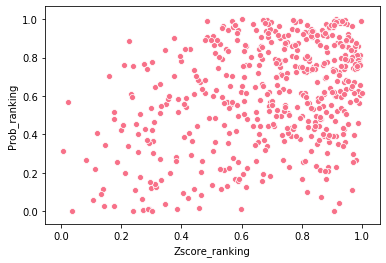

In [33]:
ax = sns.scatterplot(data=ipsc_fugue_crispr[ipsc_fugue_crispr['Label']==1], x='Zscore_ranking', y='Prob_ranking')


500
MannwhitneyuResult(statistic=621052.0, pvalue=3.3737167437287916e-19)


Text(0, 0.5, 'FUGUE ranks')

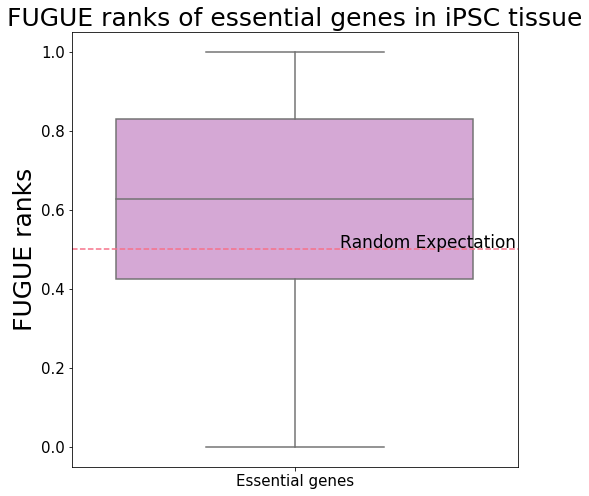

In [34]:
ax = plt.figure(figsize=(8,8))

essential_list = ipsc_fugue_crispr[ipsc_fugue_crispr['Label']==1]['Prob_ranking'].tolist()
print(len(essential_list))
othergenes_list = ipsc_fugue_crispr[ipsc_fugue_crispr['Label']!=1]['Prob_ranking'].tolist()

print(scipy.stats.mannwhitneyu(othergenes_list, essential_list, use_continuity=True, alternative='less'))

# ranks  = [essential_list,othergenes_list]
# names = ['Essential genes', 'Other genes']

ranks  = [essential_list]
names = ['Essential genes']

ax = sns.boxplot(data=ranks,color = 'plum')
ax.set(xticklabels=names)
ax.tick_params(labelsize=15)

ax.axhline(0.5, ls='--')
ax.text(0.1,0.505, "Random Expectation",fontsize=17)

plt.title('FUGUE ranks of essential genes in iPSC tissue',fontsize=25)

plt.xlabel('',fontsize=25)
plt.ylabel('FUGUE ranks',fontsize=25)
# plt.rc('axes', titlesize=12) 

0.26283569372524856


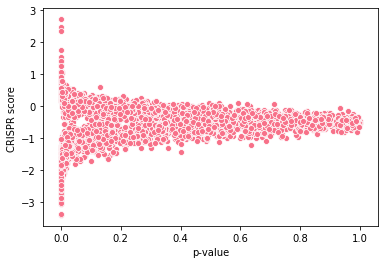

In [45]:
print(np.corrcoef(ipsc_fulltab['p-value'].tolist(), ipsc_fulltab['CRISPR score '].tolist())[0,1])
ax = sns.scatterplot(data=ipsc_fulltab, x='p-value', y='CRISPR score ')


In [63]:
ipsc_fulltab['CRISPR_abs_score'] = list(map(abs,ipsc_fulltab['CRISPR score '].tolist()))

In [64]:
ipsc_fulltab.head()

,Gene,Tissue,Zscore,Probability,Prob_ranking,Zscore_ranking,Ensembl,CRISPR score,p-value,FDR,CRISPR_abs_score
3368,XPO1,iPSC,5.195333,0.005765,0.112154,0.966354,ENSG00000082898,-3.404514,1.484276e-10,2.696335e-07,3.404514
1826,ASH2L,iPSC,4.521891,0.024472,0.519562,0.917319,ENSG00000129691,-3.359176,2.117012e-08,7.256158e-06,3.359176
726,TEX10,iPSC,5.280250,0.065644,0.808164,0.973135,ENSG00000136891,-3.033343,1.508088e-08,6.087984e-06,3.033343
2725,COG4,iPSC,0.619183,0.011624,0.283255,0.381586,ENSG00000103051,-3.029250,7.241742e-09,3.654263e-06,3.029250
648,CLP1,iPSC,4.152917,0.073346,0.828899,0.882368,ENSG00000172409,-2.999917,3.004159e-12,7.796221e-09,2.999917


0.169034058245202


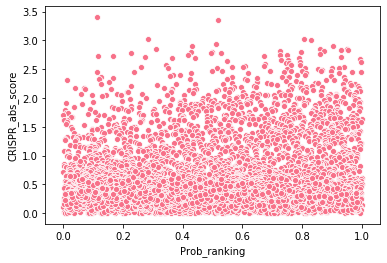

In [65]:
print(np.corrcoef(ipsc_fulltab['Prob_ranking'].tolist(), ipsc_fulltab['CRISPR_abs_score'].tolist())[0,1])
ax = sns.scatterplot(data=ipsc_fulltab, x='Prob_ranking', y='CRISPR_abs_score')

0.3169051254415479


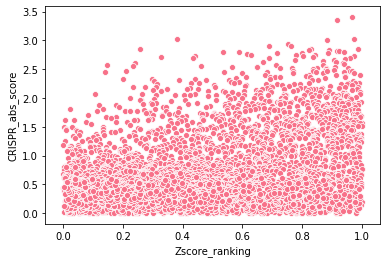

In [66]:
print(np.corrcoef(ipsc_fulltab['Zscore_ranking'].tolist(), ipsc_fulltab['CRISPR_abs_score'].tolist())[0,1])
ax = sns.scatterplot(data=ipsc_fulltab, x='Zscore_ranking', y='CRISPR_abs_score')

-0.16408013089341816


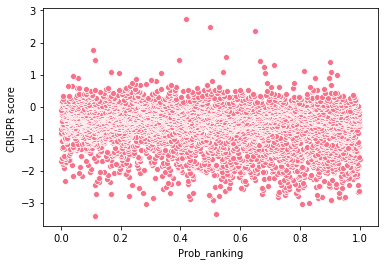

In [68]:
print(np.corrcoef(ipsc_fulltab['Prob_ranking'].tolist(), ipsc_fulltab['CRISPR score '].tolist())[0,1])
ax = sns.scatterplot(data=ipsc_fulltab, x='Prob_ranking', y='CRISPR score ')


-0.29443995934743644


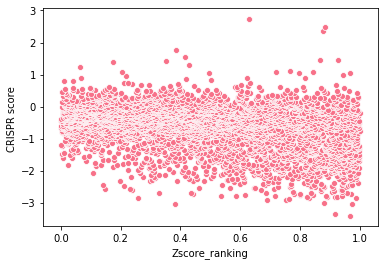

In [69]:
print(np.corrcoef(ipsc_fulltab['Zscore_ranking'].tolist(), ipsc_fulltab['CRISPR score '].tolist())[0,1])
ax = sns.scatterplot(data=ipsc_fulltab, x='Zscore_ranking', y='CRISPR score ')


In [56]:
ipsc_fulltab = ipsc_fulltab.sort_values(by=['CRISPR score '],ascending=True)
short = ipsc_fulltab[ipsc_fulltab['p-value']<=0.05]
short = short[:500]
short.head()

,Gene,Tissue,Zscore,Probability,Prob_ranking,Zscore_ranking,Ensembl,CRISPR score,p-value,FDR
3368,XPO1,iPSC,5.195333,0.005765,0.112154,0.966354,ENSG00000082898,-3.404514,1.484276e-10,2.696335e-07
1826,ASH2L,iPSC,4.521891,0.024472,0.519562,0.917319,ENSG00000129691,-3.359176,2.117012e-08,7.256158e-06
726,TEX10,iPSC,5.280250,0.065644,0.808164,0.973135,ENSG00000136891,-3.033343,1.508088e-08,6.087984e-06
2725,COG4,iPSC,0.619183,0.011624,0.283255,0.381586,ENSG00000103051,-3.029250,7.241742e-09,3.654263e-06
648,CLP1,iPSC,4.152917,0.073346,0.828899,0.882368,ENSG00000172409,-2.999917,3.004159e-12,7.796221e-09


0.9999999988053931


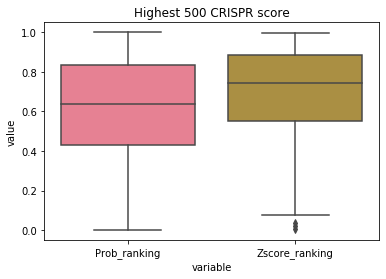

In [57]:
print(scipy.stats.wilcoxon(short['Prob_ranking'].tolist(), short['Zscore_ranking'].tolist(), zero_method='wilcox',alternative='greater')[1])
sns.boxplot(x="variable", y="value", data=pd.melt(short[['Prob_ranking','Zscore_ranking']]))
plt.title('Highest 500 CRISPR score')
plt.show()

Text(0.5, 1.0, 'Top 500 Fugue ranked genes')

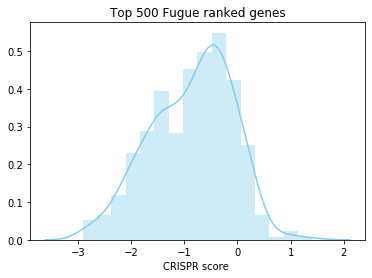

In [48]:
ipsc_fulltab = ipsc_fulltab.sort_values(by=['Prob_ranking'],ascending=False)
short = ipsc_fulltab[:500]
sns.distplot( short["CRISPR score "] , color="skyblue")
plt.title('Top 500 Fugue ranked genes')

Text(0.5, 1.0, 'Top 500 Zscore ranked genes')

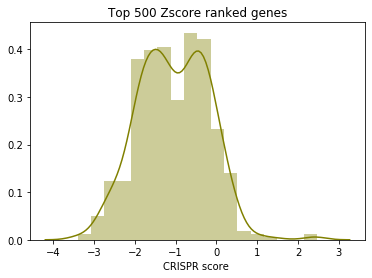

In [44]:
ipsc_fulltab = ipsc_fulltab.sort_values(by=['Zscore_ranking'],ascending=False)
short = ipsc_fulltab[:500]
sns.distplot( short["CRISPR score "] , color="olive")
plt.title('Top 500 Zscore ranked genes')

# Checking Enrichment for essential stem cell genes
gene list from this link - https://www.g3journal.org/highwire/filestream/485245/field_highwire_adjunct_files/1/TableS2.txt

In [27]:
ipsc_genes = set(ipsc_prob_df['Gene'].tolist())
len(ipsc_genes)

3834

In [28]:
essential_gene_df = pd.read_csv('./iPSC/TableS2.txt',sep='\t',header = None)
essential_gene_df = essential_gene_df.rename(columns={0:'Gene_name',1:'HGNC'})
essential_gene_df.head(2)

,Gene_name,HGNC
0,AARS,HGNC:20
1,ABCE1,HGNC:69


In [29]:
essential_gene_df.shape

(684, 2)

In [30]:
essential_genes = set(essential_gene_df['Gene_name'].tolist()) & set(ipsc_genes)
print(len(essential_genes))

251


In [31]:
othergenes = ipsc_genes - essential_genes
len(othergenes)

3583

In [32]:
ipsc_prob_df[ipsc_prob_df['Gene'].isin(essential_genes)].tail(10)

,Gene,Tissue,Probability,Prob_ranking
662,COX11,iPSC,0.004623,0.076682
2153,NKAP,iPSC,0.004363,0.068336
1891,MED12,iPSC,0.004235,0.065206
3088,SNW1,iPSC,0.003608,0.049296
1036,ERCC3,iPSC,0.003583,0.048513
817,DGCR8,iPSC,0.003012,0.035733
850,DMAP1,iPSC,0.002516,0.026604
2236,NSF,iPSC,0.001869,0.013824
510,CDK9,iPSC,0.001686,0.011215
2033,MYC,iPSC,0.000807,0.001826


In [33]:
essential_list = []

for index,row in ipsc_prob_df.iterrows():
    if row['Gene'] in (essential_genes):
        essential_list.append(1)
    else:
        essential_list.append(0)

ipsc_prob_df['essential_gene'] =  essential_list      

In [34]:
# ipsc_prob_df.to_csv('./iPSC/ipsc_prob_df.csv',index = False)

In [36]:
ipsc_prob_df = pd.read_csv('./iPSC/ipsc_prob_df.csv')
ipsc_prob_df.head()

,Gene,Tissue,Probability,Prob_ranking,essential_gene
0,UCHL1,iPSC,0.670096,1.000000,0
1,AAMP,iPSC,0.668656,0.999739,0
2,CD9,iPSC,0.530307,0.999478,0
3,WRN,iPSC,0.519672,0.999218,0
4,CKS2,iPSC,0.497037,0.998957,0


In [37]:
gt_short = gt_param_df_ipsc[['Gene','ZScore','Tissue']]
gt_short['zscore_pct_rank'] = gt_short.groupby('Tissue')['ZScore'].rank(ascending = True, pct = True)

ipsc_prob_df = ipsc_prob_df.merge(gt_short, left_on=['Gene','Tissue'], right_on= ['Gene','Tissue'])
print(ipsc_prob_df.shape)
ipsc_prob_df.head()

(3834, 7)


/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gene,Tissue,Probability,Prob_ranking,essential_gene,ZScore,zscore_pct_rank
0,UCHL1,iPSC,0.670096,1.000000,0,2.210405,0.673448
1,AAMP,iPSC,0.668656,0.999739,0,1.685050,0.600417
2,CD9,iPSC,0.530307,0.999478,0,1.149646,0.497392
3,WRN,iPSC,0.519672,0.999218,0,3.025612,0.767866
4,CKS2,iPSC,0.497037,0.998957,0,4.846468,0.942358


In [39]:
fugue_ranks = ipsc_prob_df[ipsc_prob_df['essential_gene']==1]['Prob_ranking'].tolist()
zscore_ranks = ipsc_prob_df[ipsc_prob_df['essential_gene']==1]['zscore_pct_rank'].tolist()
scipy.stats.wilcoxon(fugue_ranks, zscore_ranks, zero_method='wilcox',alternative='greater')[1]

0.9999999475451109

Text(0.5, 0, 'iPSC')

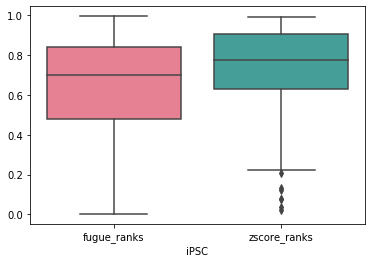

In [40]:
ranks  = [fugue_ranks,zscore_ranks]

names = ['fugue_ranks', 'zscore_ranks']
ax = sns.boxplot(data=ranks,palette="husl")
ax.set(xticklabels=names)
plt.xlabel(str(tissue))

251
MannwhitneyuResult(statistic=316103.0, pvalue=1.6589996670051466e-15)


Text(0, 0.5, 'FUGUE ranks')

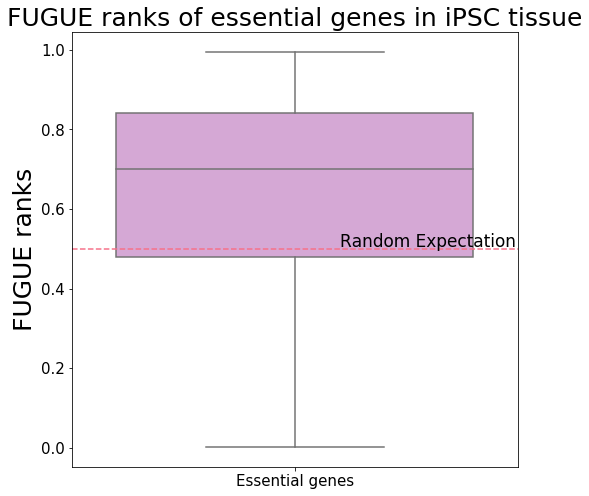

In [41]:
ax = plt.figure(figsize=(8,8))

essential_list = ipsc_prob_df[ipsc_prob_df['Gene'].isin(essential_genes)]['Prob_ranking'].tolist()
print(len(essential_list))
othergenes_list = ipsc_prob_df[ipsc_prob_df['Gene'].isin(othergenes)]['Prob_ranking'].tolist()

print(scipy.stats.mannwhitneyu(othergenes_list, essential_list, use_continuity=True, alternative='less'))

# ranks  = [essential_list,othergenes_list]
# names = ['Essential genes', 'Other genes']

ranks  = [essential_list]
names = ['Essential genes']

ax = sns.boxplot(data=ranks,color = 'plum')
ax.set(xticklabels=names)
ax.tick_params(labelsize=15)

ax.axhline(0.5, ls='--')
ax.text(0.1,0.505, "Random Expectation",fontsize=17)

plt.title('FUGUE ranks of essential genes in iPSC tissue',fontsize=25)

plt.xlabel('',fontsize=25)
plt.ylabel('FUGUE ranks',fontsize=25)
# plt.rc('axes', titlesize=12) 

MannwhitneyuResult(statistic=212690.0, pvalue=1.0585058103787904e-44)


Text(0.5, 1.0, 'Percentile rank comparision btw essential genes & other genes in iPSC tissue (p-val = 1.05e-44)')

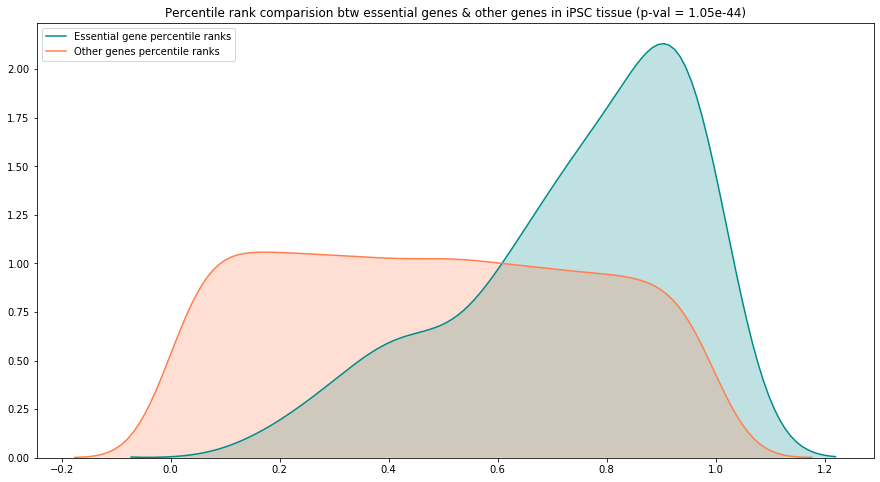

In [36]:
# ax = plt.figure(figsize=(15,8))

# essential_list = ipsc_prob_df[ipsc_prob_df['Gene'].isin(essential_genes)]['Prob_ranking'].tolist()
# othergenes_list = ipsc_prob_df[ipsc_prob_df['Gene'].isin(othergenes)]['Prob_ranking'].tolist()

# print(scipy.stats.mannwhitneyu(othergenes_list, essential_list, use_continuity=True, alternative='less'))
# p1=sns.kdeplot(essential_list, shade=True, color="darkcyan",label = 'Essential gene percentile ranks')
# p1=sns.kdeplot(othergenes_list, shade=True, color="coral", label = 'Other genes percentile ranks')

# plt.legend(loc='upper left')

# plt.title('Percentile rank comparision btw essential genes & other genes in iPSC tissue (p-val = 1.05e-44)')

# Using another list of genes
Paper - https://www.nature.com/articles/s41556-018-0088-1#Sec33

Link - https://static-content.springer.com/esm/art%3A10.1038%2Fs41556-018-0088-1/MediaObjects/41556_2018_88_MOESM5_ESM.xlsx

In [46]:
ipsc_genes = set(ipsc_prob_df['Gene'].tolist())
len(ipsc_genes)

3834

In [49]:
essential_gene_df = pd.read_excel('/cmlscratch/gowthami/GTF/GTF_Project_v2/iPSC/41556_2018_88_MOESM5_ESM.xlsx',sep='\t')
essential_gene_df.head(2)

FileNotFoundError: [Errno 2] No such file or directory: '/cmlscratch/gowthami/GTF/GTF_Project_v2/iPSC/41556_2018_88_MOESM5_ESM.xlsx'

In [51]:
essential_genes = set(essential_gene_df['Gene symbol'].tolist())

In [52]:
print(len(set(essential_gene_df['Gene symbol'].tolist())))

set(essential_gene_df['Gene symbol'].tolist()) - ipsc_genes

51


{'AUNIP',
 'BRIP1',
 'CDC25A',
 'CHAF1A',
 'CSE1L',
 'DSCC1',
 'ERCC6L',
 'FAM71F1',
 'GINS2',
 'IGF2BP1',
 'JARID2',
 'LIN28B',
 'MIS18A',
 'MYBL2',
 'POLA1',
 'POU5F1',
 'PRDM14',
 'SEPHS1',
 'SLC7A5',
 'TRIM71',
 'VRTN',
 'ZNF730',
 nan}

In [53]:
print(len(essential_genes))
common_genes = set(essential_genes) & set(ipsc_genes)
print(len(common_genes))
othergenes = ipsc_genes - essential_genes
print(len(othergenes))

51
28
3806


MannwhitneyuResult(statistic=42309.0, pvalue=0.030018233281407646)


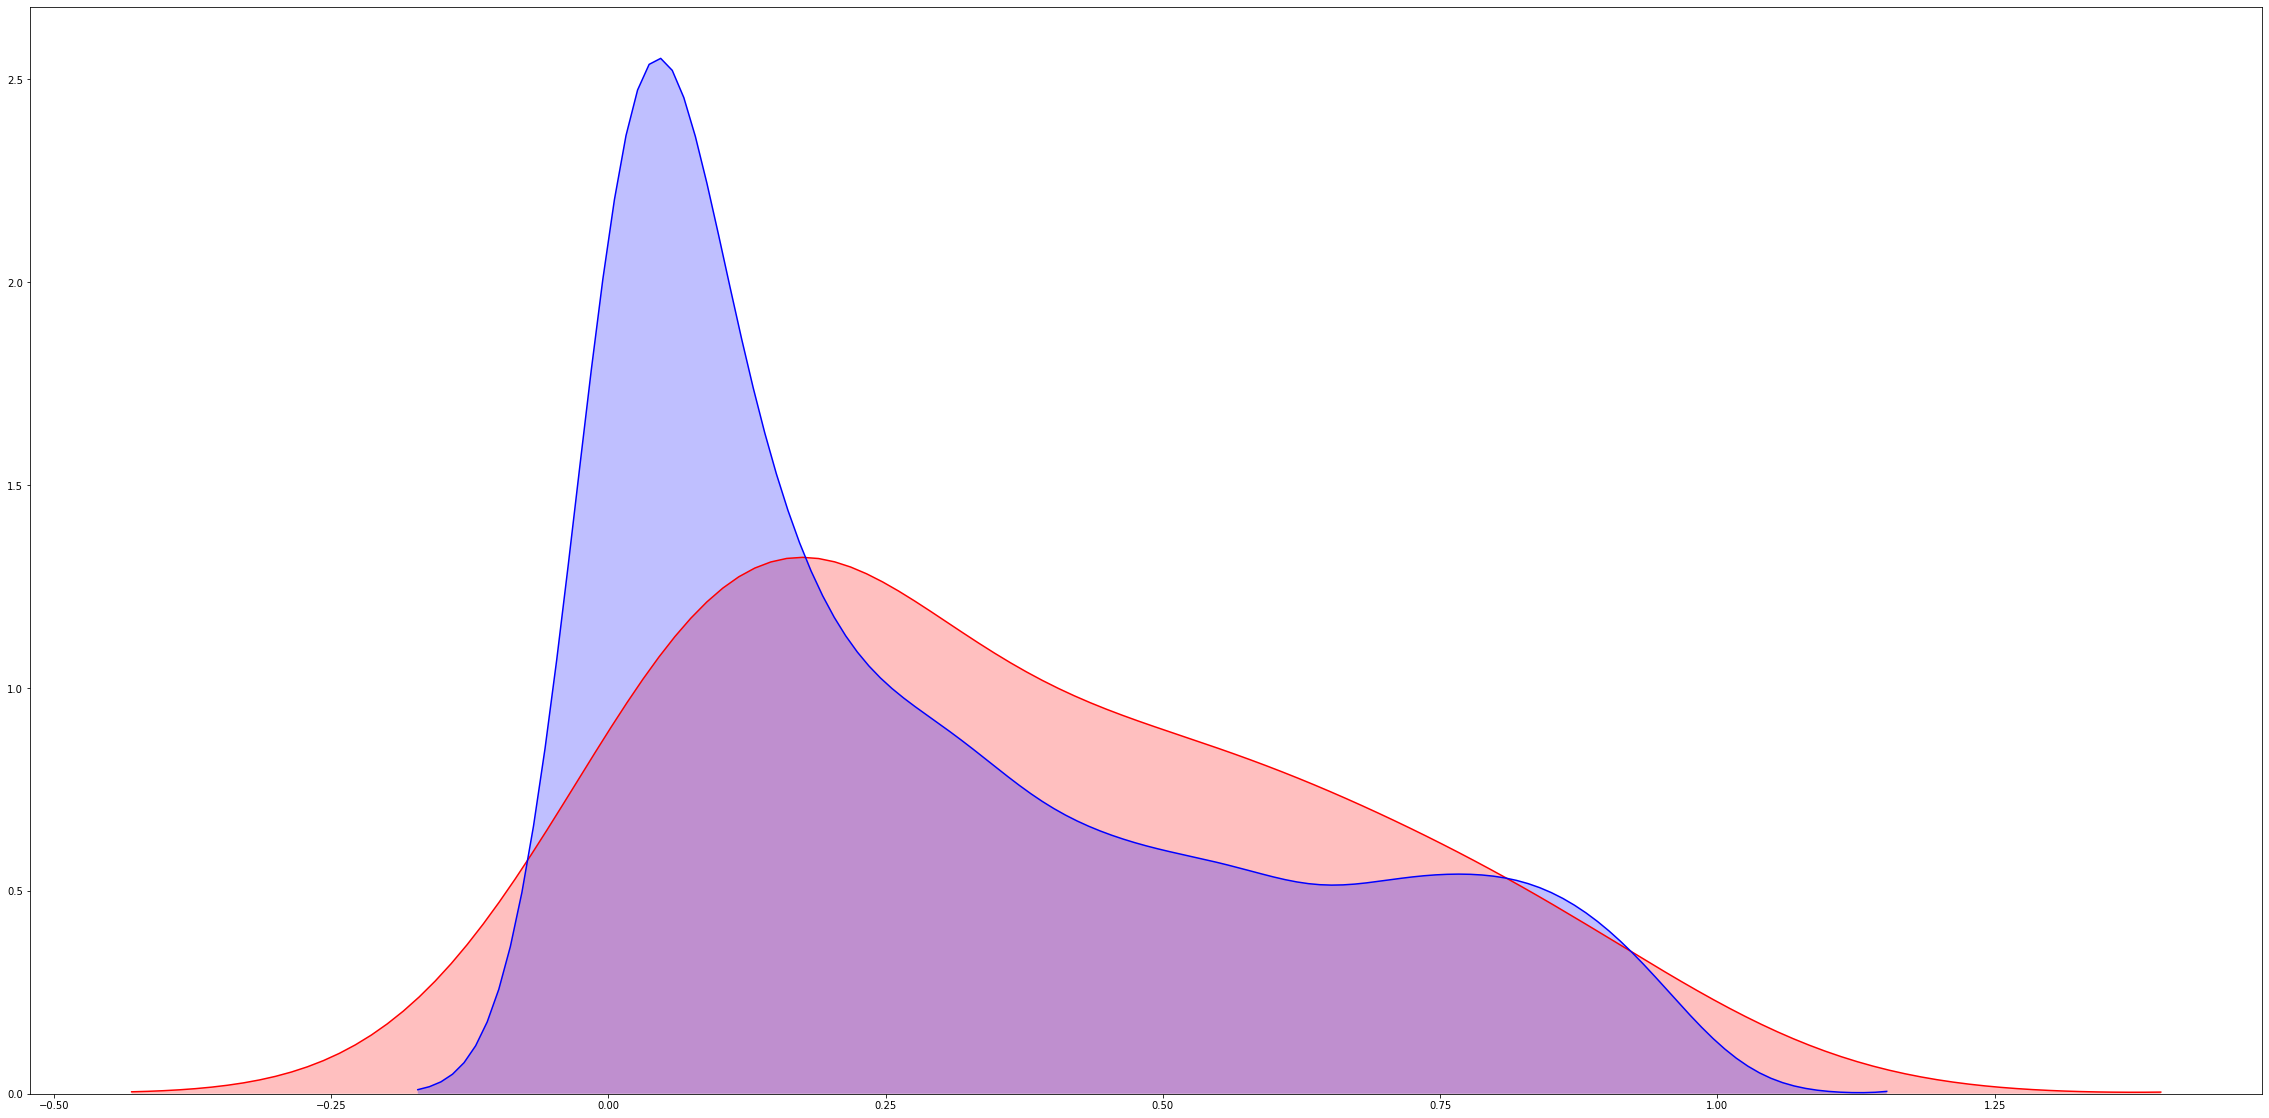

In [54]:
essential_list = ipsc_prob_df[ipsc_prob_df['Gene'].isin(essential_genes)]['Probability'].tolist()
othergenes_list = ipsc_prob_df[ipsc_prob_df['Gene'].isin(othergenes)]['Probability'].tolist()

print(scipy.stats.mannwhitneyu(othergenes_list, essential_list, use_continuity=True, alternative='less'))
p1=sns.kdeplot(essential_list, shade=True, color="r")
p1=sns.kdeplot(othergenes_list, shade=True, color="b")

# Comparing model ranking vs Zscore ranking

In [28]:
ipsc_prob_df.head()

,Gene,Tissue,Probability
4098,TFCP2,iPSC,0.991503
2629,NFYC,iPSC,0.991500
4072,TEAD4,iPSC,0.990456
4270,TRRAP,iPSC,0.989830
588,CDC5L,iPSC,0.989513


In [38]:
ipsc_prob_df.columns

Index(['Gene', 'Tissue', 'Probability'], dtype='object')

In [42]:
zscore_dict = {}

for index,row in gt_param_df_ipsc.iterrows():
    gene = row['Gene']
    zscore = row['ZScore']
    zscore_dict[gene] = zscore

In [43]:
ipsc_prob_df_ranks = ipsc_prob_df[['Gene', 'Tissue', 'Probability']]
ipsc_prob_df_ranks['Zscore'] = ipsc_prob_df_ranks['Gene'].map(zscore_dict)
ipsc_prob_df_ranks['model_rank'] = ipsc_prob_df_ranks['Probability'].rank(ascending=False)
ipsc_prob_df_ranks['zscore_rank'] = ipsc_prob_df_ranks['Zscore'].rank(ascending=False)


print(ipsc_prob_df_ranks.shape)
ipsc_prob_df_ranks.head()

(3834, 6)


/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A va

,Gene,Tissue,Probability,Zscore,model_rank,zscore_rank
0,UCHL1,iPSC,0.670096,2.210405,1.0,1253.0
1,AAMP,iPSC,0.668656,1.685050,2.0,1533.0
2,CD9,iPSC,0.530307,1.149646,3.0,1928.0
3,WRN,iPSC,0.519672,3.025612,4.0,891.0
4,CKS2,iPSC,0.497037,4.846468,5.0,222.0


In [44]:
common_genes

NameError: name 'common_genes' is not defined

In [45]:
model_ranks = ipsc_prob_df_ranks[ipsc_prob_df_ranks['Gene'].isin(common_genes)]['model_rank'].tolist()
zscore_ranks = ipsc_prob_df_ranks[ipsc_prob_df_ranks['Gene'].isin(common_genes)]['zscore_rank'].tolist()
print(len(model_ranks))
print(len(zscore_ranks))

NameError: name 'common_genes' is not defined

WilcoxonResult(statistic=397.0, pvalue=4.988849443894224e-06)


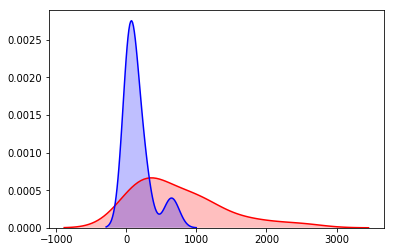

In [50]:
print(scipy.stats.wilcoxon(model_ranks, zscore_ranks, alternative='greater'))
p1=sns.kdeplot(model_ranks, shade=True, color="r")
p1=sns.kdeplot(zscore_ranks, shade=True, color="b")

Check out this additional set later maybe
Paper - https://www.sciencedirect.com/science/article/pii/S2211124719302128?via%3Dihub#bib45

Link - https://ars.els-cdn.com/content/image/1-s2.0-S2211124719302128-mmc9.xlsx